In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from keras.utils import np_utils
from scipy.stats import multivariate_normal as mvn

#Import .py file of general algorithms
from google.colab import files
files.upload()
from general import KNNClassifier as knn
from general import accuracy
from general import confusionMatrix
from general import GaussBayes as gb
from general import GaussNB as ngb
from general import R2
from general import OLS
from general import MultipleLinearRegression as mlr
from general import OurLinearRegression as olr

Saving general.py to general.py


In [2]:
#Link with your Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
my_token = open("/content/drive/MyDrive/Enhance It/Training Projects/House Remodelation/map_token.txt").read()

# General methods

Model creation, hyperparameter tuning, and test evaluation of Naive and Gaussian Bayes Classifiers.

**Inputs**
*   x_train *(numpy array)*. Input data for training the model
*   y_train *(numpy array)*. Labeled output for training the model
*   x_val *(numpy array)*. Input data for validating the model
*   y_val *(numpy array)*. Labeled output for validating the model
*   x_test *(numpy array)*. Input data for testing the model
*   y_test *(numpy array)*. Labeled output for testing the model
*   name *(string)*. Name of the feature that is being analyzed
*   show_plot *(boolean)*. Plots the model comparison

**Returns**
*   best_e *(float)*. Epsilon value of the best trained model
*   max_acc *(float)*. Validation accuracy of the best model
*   naive_test_acc *(float)*. Test accuracy of the best Naive Bayes model
*   gauss_test_acc *(float)*. Test accuracy of the best Gaussian Bayes model

In [4]:
def checkNaiveBayes(x_train,y_train, x_val,y_val, x_test,y_test, name, show_plot=False):
  model = ngb()
  epsilons = np.linspace(1e-3,1e-1)
  naive_accuracies = np.zeros(len(epsilons))

  for i in range(len(epsilons)):
    print(f'Checking epsilon {i+1} out of {len(epsilons)}...')
    model.fit(x_train,y_train,epsilon=epsilons[i])
    y_hat_naive = model.predict(x_val)
    naive_accuracies[i] = accuracy(y_val,y_hat_naive)

  max_acc = max(naive_accuracies)
  best_e = epsilons[np.where(naive_accuracies == max_acc)]
  if isinstance(best_e, np.ndarray):
    best_e = best_e[0]
  print(best_e, max_acc)

  if show_plot:
    plt.figure(figsize=(10,8))
    plt.plot(epsilons,naive_accuracies)
    plt.plot(best_e,max_acc,'*',markersize=20,label='Best model')
    plt.legend()
    plt.xlabel('Epsilon')
    plt.ylabel('Accuracy')
    plt.title(f'{name} Naive Bayes Training Accuracy')

  model.fit(x_train,y_train,epsilon=best_e)
  test_naive = model.predict(x_test)
  naive_test_acc = accuracy(y_test,test_naive)

  #print(f"Validation accuracy: {max_acc}     Test accuracy: {naive_test_acc}")
  return best_e, max_acc, naive_test_acc

In [5]:
def checkGaussianBayes(x_train,y_train, x_val,y_val, x_test,y_test, name, show_plot=False):
  model = gb()
  epsilons = np.linspace(1e-3,1e-1)
  bayes_accuracies = np.zeros(len(epsilons))

  for i in range(len(epsilons)):
    print(f'Checking epsilon {i+1} out of {len(epsilons)}...')
    model.fit(x_train,y_train,epsilon=epsilons[i])
    y_hat_gauss = model.predict(x_val)
    bayes_accuracies[i] = accuracy(y_val,y_hat_gauss)

  max_acc = max(bayes_accuracies)
  best_e = epsilons[np.where(bayes_accuracies == max_acc)]
  if isinstance(best_e, np.ndarray):
    best_e = best_e[0]
  print(best_e, max_acc)

  if show_plot:
    plt.figure(figsize=(10,8))
    plt.plot(epsilons,bayes_accuracies)
    plt.plot(best_e,max_acc,'*',markersize=20,label='Best model')
    plt.legend()
    plt.xlabel('Epsilon')
    plt.ylabel('Accuracy')
    plt.title(f'{name} Gaussian Bayes Training Accuracy')

  model.fit(x_train,y_train,epsilon=best_e)
  test_bayes = model.predict(x_test)
  gauss_test_acc = accuracy(y_test,test_bayes)

  #print(f"Validation accuracy: {max_acc}     Test accuracy: {gauss_test_acc}")
  return best_e, max_acc, gauss_test_acc

Model creation, hyperparameter tuning, and test evaluation of KNN Classifier.

**Inputs**
*   x_train *(numpy array)*. Input data for training the model
*   y_train *(numpy array)*. Labeled output for training the model
*   x_val *(numpy array)*. Input data for validating the model
*   y_val *(numpy array)*. Labeled output for validating the model
*   x_test *(numpy array)*. Input data for testing the model
*   y_test *(numpy array)*. Labeled output for testing the model
*   name *(string)*. Name of the feature that is being analyzed
*   show_plot *(boolean)*. Plots the model comparison

**Returns**
*   best_k *(int)*. Number of neighbors of the best trained model
*   max_acc *(float)*. Validation accuracy of the best model
*   knn_test_acc *(float)*. Test accuracy of the best KNN model

In [6]:
def checkKnn(x_train,y_train, x_val,y_val, x_test,y_test, name, show_plot=False):
  model = knn()
  model.fit(x_train,y_train)

  neighbors = [x for x in range(2,31)]
  knn_acc = np.zeros(len(neighbors))

  for i in range(len(neighbors)):
    print(f"Checking {neighbors[i]} neighbors out of {neighbors[-1]}...")
    y_hat = model.predict(x_val, neighbors[i])
    knn_acc[i] = accuracy(y_val,y_hat)

  max_acc = max(knn_acc)
  best_ks = np.where(knn_acc == max_acc)
  if isinstance(best_ks, tuple):
    best_k = neighbors[np.where(knn_acc == max_acc)[0][int(len(np.where(knn_acc == max_acc)[0])/2)]]
  else:
    best_k = neighbors[np.where(knn_acc == max_acc)]

  print(best_k, max_acc)

  if show_plot:
    plt.figure(figsize=(10,8))
    plt.plot(neighbors,knn_acc)
    plt.plot(best_k,max_acc,'*',markersize=20,label='Best model')
    plt.legend()
    plt.xlabel('K neighbors')
    plt.ylabel('Accuracy')
    plt.title(f'{name} KNN Training Accuracy')

  model.fit(x_train,y_train)
  test_knn = model.predict(x_test,best_k)
  knn_test_acc = accuracy(y_test,test_knn)

  #print(f"Validation accuracy: {max_acc}     Test accuracy: {knn_test_acc}")
  return best_k, max_acc, knn_test_acc

# Exploratory Data Analysis

Upload the dataset *raw_house_data.csv*

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Enhance It/Datasets/raw_house_data.csv')
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [8]:
data.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [9]:
#Check the size of the data
print(f"Size of dataset: {data.shape}")

#Check and delete for duplicates
print(f"Number of duplicate rows: {data[data.duplicated()].shape}\n")
data.drop_duplicates()

#Check for null values
print(data.isnull().sum())

Size of dataset: (5000, 16)
Number of duplicate rows: (0, 16)

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64


Keep only the *sold price*, *longitude* and *latitude* (only for geolocalization), *kitchen_features*, *fireplaces* and *floor_covering*.

In [10]:
unwanted = ['MLS','zipcode','lot_acres','taxes','year_built','bedrooms','bathrooms','fireplaces','garage','HOA']
data.drop(unwanted, inplace=True, axis=1)
data.head()

,sold_price,longitude,latitude,sqrt_ft,kitchen_features,floor_covering
0,5300000.0,-1.103.782,31.356.362,10500,"Dishwasher, Freezer, Refrigerator, Oven","Mexican Tile, Wood"
1,4200000.0,-111.045.371,31.594.213,7300,"Dishwasher, Garbage Disposal","Natural Stone, Other"
2,4200000.0,-111.040.707,31.594.844,None,"Dishwasher, Garbage Disposal, Refrigerator","Natural Stone, Other: Rock"
3,4500000.0,-111.035.925,31.645.878,9019,"Dishwasher, Double Sink, Pantry: Butler, Refri...","Ceramic Tile, Laminate, Wood"
4,3411450.0,-110.813.768,32.285.162,6396,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Concrete"


Evaluate the location of the dataset

In [11]:
feature = data['longitude']
#See how the data is stored
print(np.unique(feature))

#Join the last two values into a single one. Transform the complete data into a float number
for i in range(len(feature)):
  coord = feature[i].split('.',1)
  coord[1] = coord[1].replace('.','')
  feature[i] = float('.'.join(coord))

data['longitude'] = feature.astype(float)

['-1.103.782' '-1.106.612' '-1.106.639' ... '-111.299.663' '-111.430.863'
 '-112.520.168']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [12]:
feature = data['latitude']
#See how the data is stored
print(np.unique(feature))

#Join the last two values into a single one. Transform the complete data into a float number
for i in range(len(feature)):
  coord = feature[i].split('.',1)
  coord[1] = coord[1].replace('.','')
  feature[i] = float('.'.join(coord))

data['latitude'] = feature.astype(float)

['3.158.417' '3.159.202' '3.161.953' ... '34.314.889' '34.596.971'
 '34.927.884']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[Text(0.5, 1.0, 'longitude')]

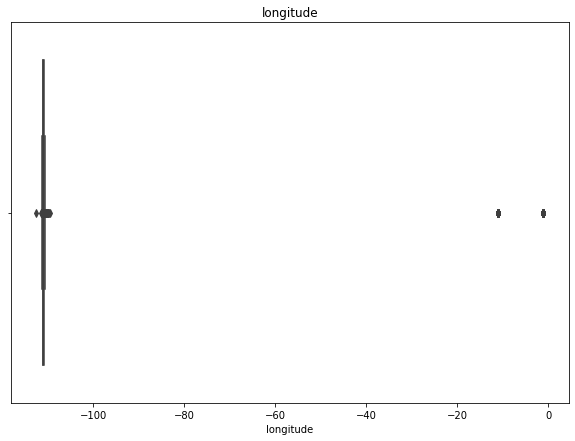

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data['longitude']).set(title='longitude')

[Text(0.5, 1.0, 'latitude')]

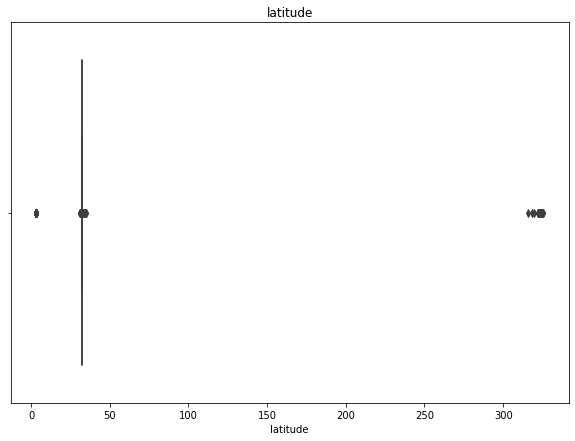

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data['latitude']).set(title='latitude')

In [15]:
#Delete the longitudes -111.19 < longitude < -110.69
data = data[(data['longitude'] > -111.19) & (data['longitude'] < -110.69)]

#Delete the latitudes 31.97 < latitude < 32.7
data = data[(data['latitude'] > 31.97) & (data['latitude'] < 32.7)]

[Text(0.5, 1.0, 'longitude')]

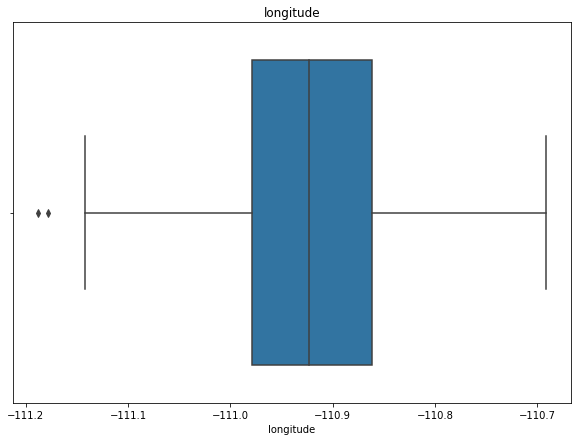

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data['longitude']).set(title='longitude')

[Text(0.5, 1.0, 'latitude')]

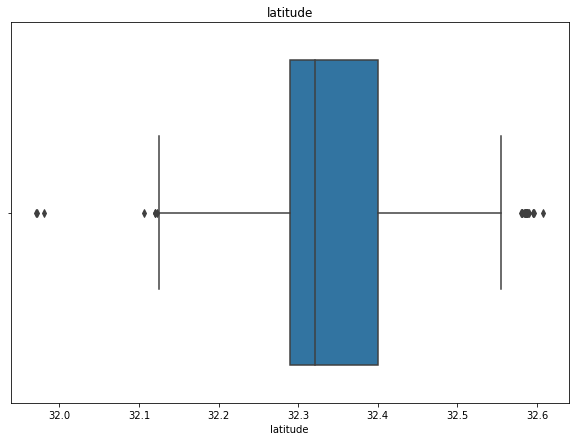

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data['latitude']).set(title='latitude')

In [18]:
px.set_mapbox_access_token(my_token)
map = px.scatter_mapbox(data,
                        lat="latitude",
                        lon="longitude",     
                        color="sold_price",
                        #color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15,
                        zoom=10)
map.show()

Check how much data is left after centering the data into the desired region

In [19]:
data.shape

(3784, 6)

Encode the features of the kitchen with the following rules:


1.   Appliance color
  *   Black
  *   Stainless
2.   Countertops
  *   Butch block
  *   Island
  *   Quartzite
3.   Microwave
4.   Electric oven
  *   Electric
  *   Electric range
5.   Convection oven
  *   Oven
  *   \# of ovens
  *   Convection
6.   Gas oven
  *   Gas range
  *   Gas cooktop
7.   Compactor
8.   Desk
9.   Dishwasher
10.  Sink
  *   Prep sink
  *   Double sink
11.  Freezer
12.  Garbage disposal
13.  Pantry
14.  Indoor grill
15.  Lazy Susan
16.  Refrigerator
17.  Water purifier
  *   Reverse osmosis
18.  Warming drawer
19.  Wet bar
20.  Wine cooler



In [20]:
""" For the kitchen_features feature, it is necessary to first separate the
characteristics into different columns. After that, we can observe which ones
each house contains, and then create a new column with the vectorized
representations of them (not one-hot encoders). """

# Join every single characteristic into one list
feature = data["kitchen_features"]
kitchen_chars = []
kitchen_vectors = []

for i in feature:
  description = i.lower().split(",")
  kitchen_chars += description

# Check the unique characteristics on the list
print(np.unique(kitchen_chars),len(np.unique(kitchen_chars)))

# Create a vector with all the unique values
labels = []

for i in kitchen_chars:
  if ':' in i:
    aux = i.split(':')[0]
    labels.append(aux) #Just keep the general feature
    #print(f"Saving {aux}")
  elif i[0] == ' ':
    aux = i[1:]
    labels.append(aux)
  else:
    labels.append(i)
    #print(f"Saving {i}")

labels = np.unique(labels) 
print(labels,len(labels))

#These labels should be given to the programming team as additional data
labels = ['appliance_color','countertops','microwave','electric_oven','convection_oven','gas_oven','compactor','desk',
          'dishwasher','sink','freezer','garbage_disposal','pantry','indoor_grill','lazy_susan','refrigerator',
          'water_purifier','warming_drawer','wet_bar','wine_cooler']

for i in feature:
  encoder = np.zeros(20)
  description = i.lower().split(",")

  for j in description:
    if ':' in j:
      j = j.split(':')[0]
    
    j = j.replace(' ','_')
    
    for k in range(len(labels)):
      if labels[k] in j:
        encoder[k] = 1
      else:
        if j == 'black' or j == 'stainless':
          encoder[0] = 1
        if j == 'butch_block' or j == 'island' or j == 'quartzite':
          encoder[1] = 1
        if 'electric' in j:
          encoder[3] = 1
        if j == 'oven' or 'convection' in j or j == '#_of_ovens':
          encoder[4] = 1
        if 'gas' in j:
          encoder[5] = 1
        if 'osmosis' in j:
          encoder[16] = 1
  
  kitchen_vectors.append(encoder)

# Create the columns with the presence of each feature
appliance = []
countertop = []
microwave = []
electric = []
convection = []
gas = []
compactor = []
desk = []
dishwasher = []
sink = []
freezer = []
garbage = []
pantry = []
grill = []
lazy = []
refrigerator = []
purifier = []
warming = []
wet = []
wine = []

for i in kitchen_vectors:
  appliance.append(i[0])
  countertop.append(i[1])
  microwave.append(i[2])
  electric.append(i[3])
  convection.append(i[4])
  gas.append(i[5])
  compactor.append(i[6])
  desk.append(i[7])
  dishwasher.append(i[8])
  sink.append(i[9])
  freezer.append(i[10])
  garbage.append(i[11])
  pantry.append(i[12])
  grill.append(i[13])
  lazy.append(i[14])
  refrigerator.append(i[15])
  purifier.append(i[16])
  warming.append(i[17])
  wet.append(i[18])
  wine.append(i[19])

data['appliance'] = appliance
data['countertop'] = countertop
data['microwave'] = microwave
data['electric'] = electric
data['convection'] = convection
data['gas'] = gas
data['compactor'] = compactor
data['desk'] = desk
data['dishwasher'] = dishwasher
data['sink'] = sink
data['freezer'] = freezer
data['garbage'] = garbage
data['pantry'] = pantry
data['grill'] = grill
data['lazy'] = lazy
data['refrigerator'] = refrigerator
data['purifier'] = purifier
data['warming'] = warming
data['wet'] = wet
data['wine'] = wine

data['appliance'] = data['appliance'].astype(int)
data['countertop'] = data['countertop'].astype(int)
data['microwave'] = data['microwave'].astype(int)
data['electric'] = data['electric'].astype(int)
data['convection'] = data['convection'].astype(int)
data['gas'] = data['gas'].astype(int)
data['compactor'] = data['compactor'].astype(int)
data['desk'] = data['desk'].astype(int)
data['dishwasher'] = data['dishwasher'].astype(int)
data['sink'] = data['sink'].astype(int)
data['freezer'] = data['freezer'].astype(int)
data['garbage'] = data['garbage'].astype(int)
data['pantry'] = data['pantry'].astype(int)
data['grill'] = data['grill'].astype(int)
data['lazy'] = data['lazy'].astype(int)
data['refrigerator'] = data['refrigerator'].astype(int)
data['purifier'] = data['purifier'].astype(int)
data['warming'] = data['warming'].astype(int)
data['wet'] = data['wet'].astype(int)
data['wine'] = data['wine'].astype(int)

[' appliance color: almond' ' appliance color: black'
 ' appliance color: other' ' appliance color: stainless'
 ' appliance color: white' ' black' ' butch block' ' convection'
 ' countertops: .' ' countertops: brazilian granite'
 ' countertops: brazillian slate' ' countertops: butcher block on isl'
 ' countertops: butcherblock/concret' ' countertops: caesar stone'
 ' countertops: caesarstone' ' countertops: ceasarstone'
 ' countertops: ceramic' ' countertops: ceramic tile'
 ' countertops: colored concrete' ' countertops: combo'
 ' countertops: composite' ' countertops: composite granite'
 ' countertops: concrete' ' countertops: concrete/wood'
 ' countertops: corian' ' countertops: corian - wood'
 ' countertops: corion' ' countertops: corrian'
 ' countertops: custom concrete' ' countertops: custom tile'
 ' countertops: custom tile &granite' ' countertops: dekton / granite'
 ' countertops: fascination quartzi' ' countertops: formica'
 ' countertops: ganite' ' countertops: garnite'
 ' cou

Encode the features of the floor column with the following rules:

1.   Mexican
  *   Talavera
2.   Porcelain
  *   100% porcelain tile
  *   italian
  *   porcelain wood
  *   porclain
3.   Stone
  *   Natural stone
  *   Cantera
4.   Acrylic
  *   acrylic overlay
5.   Wood
  *   bamboo
  *   brazilian pergo
6.   Brick
7.   Carpet
8.   Ceramic
9.   Concrete
10.  Vinyl
11.  Marble
12.   Other

In [21]:
# Join every single characteristic into one list
feature = data["floor_covering"]
floor_chars = []
floor_vectors = []

for i in feature:
  description = i.lower().split(",")
  floor_chars += description

# Check the unique characteristics on the list
print(np.unique(floor_chars),len(np.unique(floor_chars)))

# Create a vector with all the unique values
labels = []

for i in floor_chars:
  if ':' in i:
    aux = i.split(':')[1] #Save the first keyword of the description after the ':'
    labels.append(aux) #Just keep the general feature
    #print(f"Saving {aux}")
  else:
    labels.append(i)
    #print(f"Saving {i}")

labels = np.unique(labels)
print(labels,len(labels))

#These labels should be given to the programming team as additional data
labels = ['mexican','porcelain','stone','acrylic','wood','brick','carpet','ceramic',
          'concrete','vinyl','marble','other']

for i in feature:
  encoder = np.zeros(12)
  description = i.lower().split(",")

  for j in description:
    if ':' in j:
      j = j.split(':')[1]
    
    for k in range(len(labels)):
      if labels[k] == j or labels[k] in j:
        encoder[k] = 1
      else:
        if 'talavera' in j:
          encoder[0] = 1
        if 'italian' in j or 'porcelain wood' in j or 'porclain' in j:
          encoder[1] = 1
        if 'cantera' in j or 'canterra' in j:
          encoder[2] = 1
        if 'bamboo' in j or 'brazilian' in j:
          encoder[3] = 1
  
  floor_vectors.append(encoder)

# Create the columns with the presence of each feature
mexican = []
porcelain = []
stone = []
acrylic = []
wood = []
brick = []
carpet = []
ceramic = []
concrete = []
vinyl = []
marble = []
other = []

for i in floor_vectors:
  mexican.append(i[0])
  porcelain.append(i[1])
  stone.append(i[2])
  acrylic.append(i[3])
  wood.append(i[4])
  brick.append(i[5])
  carpet.append(i[6])
  ceramic.append(i[7])
  concrete.append(i[8])
  vinyl.append(i[9])
  marble.append(i[10])
  other.append(i[11])

data['mexican'] = mexican
data['porcelain'] = porcelain
data['stone'] = stone
data['acrylic'] = acrylic
data['wood'] = wood
data['brick'] = brick
data['carpet'] = carpet
data['ceramic'] = ceramic
data['concrete'] = concrete
data['vinyl'] = vinyl
data['marble'] = marble
data['other'] = other

data['mexican'] = data['mexican'].astype(int)
data['porcelain'] = data['porcelain'].astype(int)
data['stone'] = data['stone'].astype(int)
data['acrylic'] = data['acrylic'].astype(int)
data['wood'] = data['wood'].astype(int)
data['brick'] = data['brick'].astype(int)
data['carpet'] = data['carpet'].astype(int)
data['ceramic'] = data['ceramic'].astype(int)
data['concrete'] = data['concrete'].astype(int)
data['vinyl'] = data['vinyl'].astype(int)
data['marble'] = data['marble'].astype(int)
data['other'] = data['other'].astype(int)

[' ceramic tile' ' concrete' ' granite' ' indoor/outdoor' ' laminate'
 ' mexican tile' ' natural stone' ' other' ' other: acrylic overlay'
 ' other: bamboo' ' other: brazilian pergo' ' other: brick'
 ' other: brick floor' ' other: brick inlayed' ' other: brick pavers'
 ' other: canterra stone' ' other: carpet bedrooms only'
 ' other: carpet- guest house' ' other: concrete tile' ' other: cork'
 ' other: custom saltillo' ' other: dyed concrete'
 ' other: egytian sandstone' ' other: engineered wood' ' other: flagstone'
 ' other: high end laminate' ' other: itailian porclaine'
 ' other: italian tile' ' other: lime stone' ' other: limestone'
 ' other: lux vinyl' ' other: marble' ' other: marble-master bath'
 ' other: master bedroom/ tile' ' other: mesquite wood floors'
 ' other: multiple types' ' other: new wood plank tile'
 ' other: organic wool carpet' ' other: plank tile' ' other: porcelain'
 ' other: porcelain plank tile' ' other: porcelain tile'
 ' other: porcelain tile 24x24' ' other:

Visualize the dataset with the new columns

In [22]:
data = data.reset_index()
data.drop('index', inplace=True, axis=1)
data.head()

,sold_price,longitude,latitude,sqrt_ft,kitchen_features,floor_covering,appliance,countertop,microwave,electric,...,stone,acrylic,wood,brick,carpet,ceramic,concrete,vinyl,marble,other
0,3411450.0,-110.813768,32.285162,6396,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Concrete",0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,2400000.0,-110.883315,32.261069,12025,"Dishwasher, Garbage Disposal, Oven","Carpet, Natural Stone, Wood, Other",0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
2,2500000.0,-110.861002,32.331603,8921,"Compactor, Dishwasher, Freezer, Garbage Dispos...","Carpet, Natural Stone, Wood",0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
3,3700000.0,-110.912156,32.343601,5238,"Compactor, Dishwasher, Freezer, Garbage Dispos...","Carpet, Natural Stone, Wood, Other",0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,2050000.0,-110.918294,32.341609,7230,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Natural Stone, Wood",0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


In [23]:
data.dtypes

sold_price          float64
longitude           float64
latitude            float64
sqrt_ft              object
kitchen_features     object
floor_covering       object
appliance             int64
countertop            int64
microwave             int64
electric              int64
convection            int64
gas                   int64
compactor             int64
desk                  int64
dishwasher            int64
sink                  int64
freezer               int64
garbage               int64
pantry                int64
grill                 int64
lazy                  int64
refrigerator          int64
purifier              int64
warming               int64
wet                   int64
wine                  int64
mexican               int64
porcelain             int64
stone                 int64
acrylic               int64
wood                  int64
brick                 int64
carpet                int64
ceramic               int64
concrete              int64
vinyl               

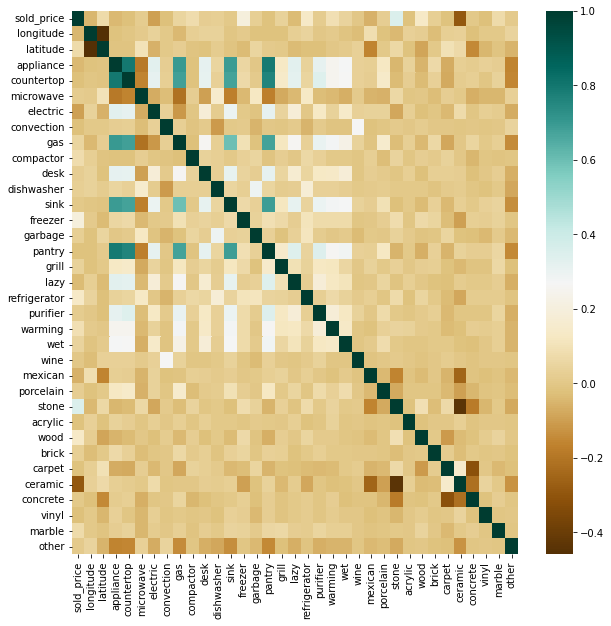

In [24]:
plt.figure(figsize=(10,10))
heat1 = data.corr()
sns.heatmap(heat1,cmap="BrBG",annot=False)

Text(0.5, 1.0, 'appliance')

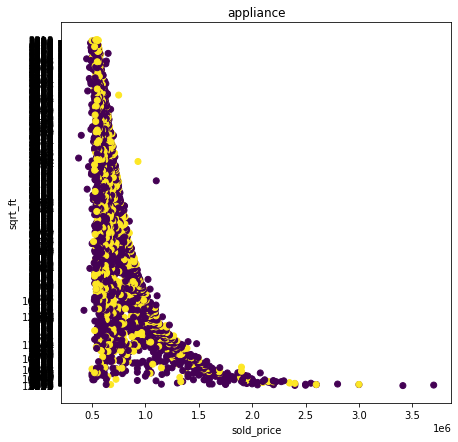

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['appliance'])
plt.xlabel('sold_price')
plt.ylabel('sqrt_ft')
plt.title('appliance')

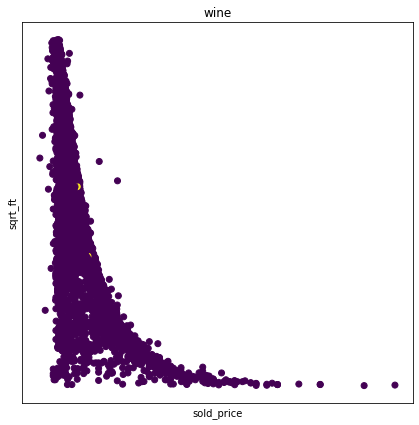

In [26]:
plt.figure(figsize=(7,7))
plt.yticks([])
plt.xticks([])
plt.xlabel('sold_price')
plt.ylabel('sqrt_ft')
#plt.title('appliance')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['appliance'])
#plt.title('countertop')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['countertop'])
#plt.title('microwave')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['microwave'])
#plt.title('electric')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['electric'])
#plt.title('convection')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['convection'])
#plt.title('gas')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['gas'])
#plt.title('compactor')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['compactor'])
#plt.title('desk')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['desk'])
#plt.title('dishwasher')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['dishwasher'])
#plt.title('sink')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['sink'])
#plt.title('freezer')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['freezer'])
#plt.title('garbage')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['garbage'])
#plt.title('pantry')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['pantry'])
#plt.title('grill')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['grill'])
#plt.title('lazy')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['lazy'])
#plt.title('refrigerator')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['refrigerator'])
#plt.title('purifier')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['purifier'])
#plt.title('warming')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['warming'])
#plt.title('wet')
#plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['wet'])
plt.title('wine')
plt.scatter(data['sold_price'],data['sqrt_ft'],c=data['wine'])

# Evaluate the chance of having a particular feature

Since every feature is presented in a binary way, the best idea is to make a classification of the model to determine the presence or abscense of it.

# Appliance color models

Naive Bayes

In [27]:
# General dataset for all features
features = ['appliance','countertop','microwave','electric','convection','gas',
            'compactor','desk','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [28]:
app_y_train = X[:train_idx,0]
app_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {app_x_train.shape}, {app_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [29]:
app_naiveE, app_naive_valAcc, app_naive_testAcc = checkNaiveBayes(app_x_train,
                                                                        app_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Appliance color',
                                                                        show_plot=False)

print(f"Validation accuracy: {app_naive_valAcc}     Test accuracy: {app_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [30]:
app_gaussE, app_gauss_valAcc, app_gauss_testAcc = checkGaussianBayes(app_x_train,
                                                                        app_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Appliance color',
                                                                        show_plot=False)

print(f"Validation accuracy: {app_gauss_valAcc}     Test accuracy: {app_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [31]:
app_knnE, app_knn_valAcc, app_knn_testAcc = checkKnn(app_x_train,
                                                     app_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Appliance color',
                                                     show_plot=False)

print(f"Validation accuracy: {app_knn_valAcc}     Test accuracy: {app_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Countertop models

Naive Bayes

In [32]:
# General dataset for all features
features = ['countertop','appliance','microwave','electric','convection','gas',
            'compactor','desk','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [33]:
cou_y_train = X[:train_idx,0]
cou_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {cou_x_train.shape}, {cou_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [34]:
count_naiveE, count_naive_valAcc, count_naive_testAcc = checkNaiveBayes(cou_x_train,
                                                                        cou_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Countertops',
                                                                        show_plot=False)

print(f"Validation accuracy: {count_naive_valAcc}     Test accuracy: {count_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [35]:
count_gaussE, count_gauss_valAcc, count_gauss_testAcc = checkGaussianBayes(cou_x_train,
                                                                        cou_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Countertops',
                                                                        show_plot=False)

print(f"Validation accuracy: {count_gauss_valAcc}     Test accuracy: {count_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [36]:
count_knnE, count_knn_valAcc, count_knn_testAcc = checkKnn(cou_x_train,
                                                     cou_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Countertops',
                                                     show_plot=False)

print(f"Validation accuracy: {count_knn_valAcc}     Test accuracy: {count_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Microwave models

Naive Bayes

In [37]:
# General dataset for all features
features = ['microwave','appliance','countertop','electric','convection','gas',
            'compactor','desk','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [38]:
mic_y_train = X[:train_idx,0]
mic_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {mic_x_train.shape}, {mic_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [39]:
micro_naiveE, micro_naive_valAcc, micro_naive_testAcc = checkNaiveBayes(mic_x_train,
                                                                        mic_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Microwaves',
                                                                        show_plot=False)

print(f"Validation accuracy: {micro_naive_valAcc}     Test accuracy: {micro_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [40]:
micro_gaussE, micro_gauss_valAcc, micro_gauss_testAcc = checkGaussianBayes(mic_x_train,
                                                                        mic_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Microwaves',
                                                                        show_plot=False)

print(f"Validation accuracy: {micro_gauss_valAcc}     Test accuracy: {micro_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [41]:
micro_knnE, micro_knn_valAcc, micro_knn_testAcc = checkKnn(mic_x_train,
                                                     mic_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Microwaves',
                                                     show_plot=False)

print(f"Validation accuracy: {micro_knn_valAcc}     Test accuracy: {micro_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Electric oven models

Naive Bayes

In [42]:
# General dataset for all features
features = ['electric','appliance','countertop','microwave','convection','gas',
            'compactor','desk','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [43]:
ele_y_train = X[:train_idx,0]
ele_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {ele_x_train.shape}, {ele_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [44]:
ele_naiveE, ele_naive_valAcc, ele_naive_testAcc = checkNaiveBayes(ele_x_train,
                                                                        ele_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Electric oven',
                                                                        show_plot=False)

print(f"Validation accuracy: {ele_naive_valAcc}     Test accuracy: {ele_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [45]:
ele_gaussE, ele_gauss_valAcc, ele_gauss_testAcc = checkGaussianBayes(ele_x_train,
                                                                        ele_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Electric oven',
                                                                        show_plot=False)

print(f"Validation accuracy: {ele_gauss_valAcc}     Test accuracy: {ele_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [46]:
ele_knnE, ele_knn_valAcc, ele_knn_testAcc = checkKnn(ele_x_train,
                                                     ele_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Electric oven',
                                                     show_plot=False)

print(f"Validation accuracy: {ele_knn_valAcc}     Test accuracy: {ele_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Convection oven models

Naive Bayes

In [47]:
# General dataset for all features
features = ['convection','appliance','countertop','microwave','electric','gas',
            'compactor','desk','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [48]:
con_y_train = X[:train_idx,0]
con_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {con_x_train.shape}, {con_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [49]:
conv_naiveE, conv_naive_valAcc, conv_naive_testAcc = checkNaiveBayes(con_x_train,
                                                                        con_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Convection oven',
                                                                        show_plot=False)

print(f"Validation accuracy: {conv_naive_valAcc}     Test accuracy: {conv_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [50]:
conv_gaussE, conv_gauss_valAcc, conv_gauss_testAcc = checkGaussianBayes(con_x_train,
                                                                        con_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Convection oven',
                                                                        show_plot=False)

print(f"Validation accuracy: {conv_gauss_valAcc}     Test accuracy: {conv_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [51]:
conv_knnE, conv_knn_valAcc, conv_knn_testAcc = checkKnn(con_x_train,
                                                     con_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Convection oven',
                                                     show_plot=False)

print(f"Validation accuracy: {conv_knn_valAcc}     Test accuracy: {conv_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Gas oven models

Naive Bayes

In [52]:
# General dataset for all features
features = ['gas','appliance','countertop','microwave','electric','convection',
            'compactor','desk','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [53]:
gas_y_train = X[:train_idx,0]
gas_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {gas_x_train.shape}, {gas_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [54]:
gas_naiveE, gas_naive_valAcc, gas_naive_testAcc = checkNaiveBayes(gas_x_train,
                                                                        gas_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Gas oven',
                                                                        show_plot=False)

print(f"Validation accuracy: {gas_naive_valAcc}     Test accuracy: {gas_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [55]:
gas_gaussE, gas_gauss_valAcc, gas_gauss_testAcc = checkGaussianBayes(gas_x_train,
                                                                        gas_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Gas oven',
                                                                        show_plot=False)

print(f"Validation accuracy: {gas_gauss_valAcc}     Test accuracy: {gas_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [56]:
gas_knnE, gas_knn_valAcc, gas_knn_testAcc = checkKnn(gas_x_train,
                                                     gas_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Gas oven',
                                                     show_plot=False)

print(f"Validation accuracy: {gas_knn_valAcc}     Test accuracy: {gas_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Compactor models

Naive Bayes

In [57]:
# General dataset for all features
features = ['compactor','appliance','countertop','microwave','electric','convection',
            'gas','desk','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [58]:
com_y_train = X[:train_idx,0]
com_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {com_x_train.shape}, {com_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [59]:
com_naiveE, com_naive_valAcc, com_naive_testAcc = checkNaiveBayes(com_x_train,
                                                                        com_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Compactor',
                                                                        show_plot=False)

print(f"Validation accuracy: {com_naive_valAcc}     Test accuracy: {com_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [60]:
com_gaussE, com_gauss_valAcc, com_gauss_testAcc = checkGaussianBayes(com_x_train,
                                                                        com_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Compactor',
                                                                        show_plot=False)

print(f"Validation accuracy: {com_gauss_valAcc}     Test accuracy: {com_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [61]:
com_knnE, com_knn_valAcc, com_knn_testAcc = checkKnn(com_x_train,
                                                     com_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Compactor',
                                                     show_plot=False)

print(f"Validation accuracy: {com_knn_valAcc}     Test accuracy: {com_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Desk models

Naive Bayes

In [62]:
# General dataset for all features
features = ['desk','appliance','countertop','microwave','electric','convection',
            'gas','compactor','dishwasher','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [63]:
des_y_train = X[:train_idx,0]
des_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {des_x_train.shape}, {des_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [64]:
des_naiveE, des_naive_valAcc, des_naive_testAcc = checkNaiveBayes(des_x_train,
                                                                        des_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Desk',
                                                                        show_plot=False)

print(f"Validation accuracy: {des_naive_valAcc}     Test accuracy: {des_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [65]:
des_gaussE, des_gauss_valAcc, des_gauss_testAcc = checkGaussianBayes(des_x_train,
                                                                        des_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Desk',
                                                                        show_plot=False)

print(f"Validation accuracy: {des_gauss_valAcc}     Test accuracy: {des_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [66]:
des_knnE, des_knn_valAcc, des_knn_testAcc = checkKnn(des_x_train,
                                                     des_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Desk',
                                                     show_plot=False)

print(f"Validation accuracy: {des_knn_valAcc}     Test accuracy: {des_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Dishwasher models

Naive Bayes

In [67]:
# General dataset for all features
features = ['dishwasher','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','sink','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [68]:
dis_y_train = X[:train_idx,0]
dis_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {dis_x_train.shape}, {dis_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [69]:
dis_naiveE, dis_naive_valAcc, dis_naive_testAcc = checkNaiveBayes(dis_x_train,
                                                                        dis_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Dishwasher',
                                                                        show_plot=False)

print(f"Validation accuracy: {dis_naive_valAcc}     Test accuracy: {dis_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [70]:
dis_gaussE, dis_gauss_valAcc, dis_gauss_testAcc = checkGaussianBayes(dis_x_train,
                                                                        dis_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Dishwasher',
                                                                        show_plot=False)

print(f"Validation accuracy: {dis_gauss_valAcc}     Test accuracy: {dis_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [71]:
dis_knnE, dis_knn_valAcc, dis_knn_testAcc = checkKnn(dis_x_train,
                                                     dis_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Dishwasher',
                                                     show_plot=False)

print(f"Validation accuracy: {dis_knn_valAcc}     Test accuracy: {dis_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Sink models

Naive Bayes

In [72]:
# General dataset for all features
features = ['sink','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','freezer','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [73]:
sin_y_train = X[:train_idx,0]
sin_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {sin_x_train.shape}, {sin_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [74]:
sink_naiveE, sink_naive_valAcc, sink_naive_testAcc = checkNaiveBayes(sin_x_train,
                                                                        sin_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Sink',
                                                                        show_plot=False)

print(f"Validation accuracy: {sink_naive_valAcc}     Test accuracy: {sink_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [75]:
sink_gaussE, sink_gauss_valAcc, sink_gauss_testAcc = checkGaussianBayes(sin_x_train,
                                                                        sin_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Sink',
                                                                        show_plot=False)

print(f"Validation accuracy: {sink_gauss_valAcc}     Test accuracy: {sink_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [76]:
sink_knnE, sink_knn_valAcc, sink_knn_testAcc = checkKnn(sin_x_train,
                                                     sin_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Sink',
                                                     show_plot=False)

print(f"Validation accuracy: {sink_knn_valAcc}     Test accuracy: {sink_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Freezer models

Naive Bayes

In [77]:
# General dataset for all features
features = ['freezer','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','garbage','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [78]:
fre_y_train = X[:train_idx,0]
fre_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {fre_x_train.shape}, {fre_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [79]:
fre_naiveE, fre_naive_valAcc, fre_naive_testAcc = checkNaiveBayes(fre_x_train,
                                                                        fre_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Freezer',
                                                                        show_plot=False)

print(f"Validation accuracy: {fre_naive_valAcc}     Test accuracy: {fre_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [80]:
fre_gaussE, fre_gauss_valAcc, fre_gauss_testAcc = checkGaussianBayes(fre_x_train,
                                                                        fre_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Freezer',
                                                                        show_plot=False)

print(f"Validation accuracy: {fre_gauss_valAcc}     Test accuracy: {fre_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [81]:
fre_knnE, fre_knn_valAcc, fre_knn_testAcc = checkKnn(fre_x_train,
                                                     fre_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Freezer',
                                                     show_plot=False)

print(f"Validation accuracy: {fre_knn_valAcc}     Test accuracy: {fre_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Garbage disposal models

Naive Bayes

In [82]:
# General dataset for all features
features = ['garbage','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','pantry',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [83]:
gar_y_train = X[:train_idx,0]
gar_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {gar_x_train.shape}, {gar_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [84]:
gar_naiveE, gar_naive_valAcc, gar_naive_testAcc = checkNaiveBayes(gar_x_train,
                                                                        gar_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Garbage disposal',
                                                                        show_plot=False)

print(f"Validation accuracy: {gar_naive_valAcc}     Test accuracy: {gar_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [85]:
gar_gaussE, gar_gauss_valAcc, gar_gauss_testAcc = checkGaussianBayes(gar_x_train,
                                                                        gar_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Garbage disposal',
                                                                        show_plot=False)

print(f"Validation accuracy: {gar_gauss_valAcc}     Test accuracy: {gar_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [86]:
gar_knnE, gar_knn_valAcc, gar_knn_testAcc = checkKnn(gar_x_train,
                                                     gar_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Garbage disposal',
                                                     show_plot=False)

print(f"Validation accuracy: {gar_knn_valAcc}     Test accuracy: {gar_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Pantry models

Naive Bayes

In [87]:
# General dataset for all features
features = ['pantry','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [88]:
pan_y_train = X[:train_idx,0]
pan_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {pan_x_train.shape}, {pan_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [89]:
pan_naiveE, pan_naive_valAcc, pan_naive_testAcc = checkNaiveBayes(pan_x_train,
                                                                        pan_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Pantry',
                                                                        show_plot=False)

print(f"Validation accuracy: {pan_naive_valAcc}     Test accuracy: {pan_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [90]:
pan_gaussE, pan_gauss_valAcc, pan_gauss_testAcc = checkGaussianBayes(pan_x_train,
                                                                        pan_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Pantry',
                                                                        show_plot=False)

print(f"Validation accuracy: {pan_gauss_valAcc}     Test accuracy: {pan_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [91]:
pan_knnE, pan_knn_valAcc, pan_knn_testAcc = checkKnn(pan_x_train,
                                                     pan_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Pantry',
                                                     show_plot=False)

print(f"Validation accuracy: {pan_knn_valAcc}     Test accuracy: {pan_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Indoor grill models

Naive Bayes

In [92]:
# General dataset for all features
features = ['grill','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [93]:
gri_y_train = X[:train_idx,0]
gri_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {gri_x_train.shape}, {gri_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [94]:
grill_naiveE, grill_naive_valAcc, grill_naive_testAcc = checkNaiveBayes(gri_x_train,
                                                                        gri_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Indoor grill',
                                                                        show_plot=False)

print(f"Validation accuracy: {grill_naive_valAcc}     Test accuracy: {grill_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [95]:
grill_gaussE, grill_gauss_valAcc, grill_gauss_testAcc = checkGaussianBayes(gri_x_train,
                                                                        gri_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Indoor grill',
                                                                        show_plot=False)

print(f"Validation accuracy: {grill_gauss_valAcc}     Test accuracy: {grill_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [96]:
grill_knnE, grill_knn_valAcc, grill_knn_testAcc = checkKnn(gri_x_train,
                                                     gri_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Indoor grill',
                                                     show_plot=False)

print(f"Validation accuracy: {grill_knn_valAcc}     Test accuracy: {grill_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Lazy Susan models

Naive Bayes

In [97]:
# General dataset for all features
features = ['lazy','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','grill','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [98]:
laz_y_train = X[:train_idx,0]
laz_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {laz_x_train.shape}, {laz_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [99]:
laz_naiveE, laz_naive_valAcc, laz_naive_testAcc = checkNaiveBayes(laz_x_train,
                                                                        laz_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Lazy Susan',
                                                                        show_plot=False)

print(f"Validation accuracy: {laz_naive_valAcc}     Test accuracy: {laz_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [100]:
laz_gaussE, laz_gauss_valAcc, laz_gauss_testAcc = checkGaussianBayes(laz_x_train,
                                                                        laz_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Lazy Susan',
                                                                        show_plot=False)

print(f"Validation accuracy: {laz_gauss_valAcc}     Test accuracy: {laz_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [101]:
laz_knnE, laz_knn_valAcc, laz_knn_testAcc = checkKnn(laz_x_train,
                                                     laz_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Lazy Susan',
                                                     show_plot=False)

print(f"Validation accuracy: {laz_knn_valAcc}     Test accuracy: {laz_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Refrigerator models

Naive Bayes

In [102]:
# General dataset for all features
features = ['refrigerator','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','grill','lazy','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [103]:
ref_y_train = X[:train_idx,0]
ref_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {ref_x_train.shape}, {ref_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [104]:
ref_naiveE, ref_naive_valAcc, ref_naive_testAcc = checkNaiveBayes(ref_x_train,
                                                                        ref_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Refrigerator',
                                                                        show_plot=False)

print(f"Validation accuracy: {ref_naive_valAcc}     Test accuracy: {ref_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [105]:
ref_gaussE, ref_gauss_valAcc, ref_gauss_testAcc = checkGaussianBayes(ref_x_train,
                                                                        ref_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Refrigerator',
                                                                        show_plot=False)

print(f"Validation accuracy: {ref_gauss_valAcc}     Test accuracy: {ref_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [106]:
ref_knnE, ref_knn_valAcc, ref_knn_testAcc = checkKnn(ref_x_train,
                                                     ref_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Refrigerator',
                                                     show_plot=False)

print(f"Validation accuracy: {ref_knn_valAcc}     Test accuracy: {ref_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Water purifier models

Naive Bayes

In [107]:
# General dataset for all features
features = ['purifier','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','grill','lazy','refrigerator','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [108]:
wat_y_train = X[:train_idx,0]
wat_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {wat_x_train.shape}, {wat_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [109]:
wat_naiveE, wat_naive_valAcc, wat_naive_testAcc = checkNaiveBayes(wat_x_train,
                                                                        wat_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Water purifier',
                                                                        show_plot=False)

print(f"Validation accuracy: {wat_naive_valAcc}     Test accuracy: {wat_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [110]:
wat_gaussE, wat_gauss_valAcc, wat_gauss_testAcc = checkGaussianBayes(wat_x_train,
                                                                        wat_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Water purifier',
                                                                        show_plot=False)

print(f"Validation accuracy: {wat_gauss_valAcc}     Test accuracy: {wat_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [111]:
wat_knnE, wat_knn_valAcc, wat_knn_testAcc = checkKnn(wat_x_train,
                                                     wat_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Water purifier',
                                                     show_plot=False)

print(f"Validation accuracy: {wat_knn_valAcc}     Test accuracy: {wat_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Warming drawer models

Naive Bayes

In [112]:
# General dataset for all features
features = ['warming','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','grill','lazy','refrigerator','purifier','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [113]:
war_y_train = X[:train_idx,0]
war_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {war_x_train.shape}, {war_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [114]:
war_naiveE, war_naive_valAcc, war_naive_testAcc = checkNaiveBayes(war_x_train,
                                                                        war_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Warming drawer',
                                                                        show_plot=False)

print(f"Validation accuracy: {war_naive_valAcc}     Test accuracy: {war_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [115]:
war_gaussE, war_gauss_valAcc, war_gauss_testAcc = checkGaussianBayes(war_x_train,
                                                                        war_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Warming drawer',
                                                                        show_plot=False)

print(f"Validation accuracy: {war_gauss_valAcc}     Test accuracy: {war_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [116]:
war_knnE, war_knn_valAcc, war_knn_testAcc = checkKnn(war_x_train,
                                                     war_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Warming drawer',
                                                     show_plot=False)

print(f"Validation accuracy: {war_knn_valAcc}     Test accuracy: {war_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Wet bar models

Naive Bayes

In [117]:
# General dataset for all features
features = ['wet','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','grill','lazy','refrigerator','purifier','warming','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [118]:
wet_y_train = X[:train_idx,0]
wet_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {wet_x_train.shape}, {wet_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [119]:
wet_naiveE, wet_naive_valAcc, wet_naive_testAcc = checkNaiveBayes(wet_x_train,
                                                                        wet_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Wet bar',
                                                                        show_plot=False)

print(f"Validation accuracy: {wet_naive_valAcc}     Test accuracy: {wet_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [120]:
wet_gaussE, wet_gauss_valAcc, wet_gauss_testAcc = checkGaussianBayes(wet_x_train,
                                                                        wet_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Wet bar',
                                                                        show_plot=False)

print(f"Validation accuracy: {wet_gauss_valAcc}     Test accuracy: {wet_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [121]:
wet_knnE, wet_knn_valAcc, wet_knn_testAcc = checkKnn(wet_x_train,
                                                     wet_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Wet bar',
                                                     show_plot=False)

print(f"Validation accuracy: {wet_knn_valAcc}     Test accuracy: {wet_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Wine cooler models

Naive Bayes

In [122]:
# General dataset for all features
features = ['wine','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','grill','lazy','refrigerator','purifier','warming','wet']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [123]:
win_y_train = X[:train_idx,0]
win_x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {win_x_train.shape}, {win_y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 19), (2838,)
Validation set: (379, 19), (379,)
Test set: (567, 19), (567,)


In [124]:
win_naiveE, win_naive_valAcc, win_naive_testAcc = checkNaiveBayes(win_x_train,
                                                                        win_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Wine cooler',
                                                                        show_plot=False)

print(f"Validation accuracy: {win_naive_valAcc}     Test accuracy: {win_naive_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

Gaussian Bayes

In [125]:
win_gaussE, win_gauss_valAcc, win_gauss_testAcc = checkGaussianBayes(win_x_train,
                                                                        win_y_train,
                                                                        x_val,
                                                                        y_val,
                                                                        x_test,
                                                                        y_test,
                                                                        'Wine cooler',
                                                                        show_plot=False)

print(f"Validation accuracy: {win_gauss_valAcc}     Test accuracy: {win_gauss_testAcc}")

Checking epsilon 1 out of 50...
Checking epsilon 2 out of 50...
Checking epsilon 3 out of 50...
Checking epsilon 4 out of 50...
Checking epsilon 5 out of 50...
Checking epsilon 6 out of 50...
Checking epsilon 7 out of 50...
Checking epsilon 8 out of 50...
Checking epsilon 9 out of 50...
Checking epsilon 10 out of 50...
Checking epsilon 11 out of 50...
Checking epsilon 12 out of 50...
Checking epsilon 13 out of 50...
Checking epsilon 14 out of 50...
Checking epsilon 15 out of 50...
Checking epsilon 16 out of 50...
Checking epsilon 17 out of 50...
Checking epsilon 18 out of 50...
Checking epsilon 19 out of 50...
Checking epsilon 20 out of 50...
Checking epsilon 21 out of 50...
Checking epsilon 22 out of 50...
Checking epsilon 23 out of 50...
Checking epsilon 24 out of 50...
Checking epsilon 25 out of 50...
Checking epsilon 26 out of 50...
Checking epsilon 27 out of 50...
Checking epsilon 28 out of 50...
Checking epsilon 29 out of 50...
Checking epsilon 30 out of 50...
Checking epsilon 31

KNN

In [126]:
win_knnE, win_knn_valAcc, win_knn_testAcc = checkKnn(win_x_train,
                                                     win_y_train,
                                                     x_val,
                                                     y_val,
                                                     x_test,
                                                     y_test,
                                                     'Wine cooler',
                                                     show_plot=False)

print(f"Validation accuracy: {win_knn_valAcc}     Test accuracy: {win_knn_testAcc}")

Checking 2 neighbors out of 30...
Checking 3 neighbors out of 30...
Checking 4 neighbors out of 30...
Checking 5 neighbors out of 30...
Checking 6 neighbors out of 30...
Checking 7 neighbors out of 30...
Checking 8 neighbors out of 30...
Checking 9 neighbors out of 30...
Checking 10 neighbors out of 30...
Checking 11 neighbors out of 30...
Checking 12 neighbors out of 30...
Checking 13 neighbors out of 30...
Checking 14 neighbors out of 30...
Checking 15 neighbors out of 30...
Checking 16 neighbors out of 30...
Checking 17 neighbors out of 30...
Checking 18 neighbors out of 30...
Checking 19 neighbors out of 30...
Checking 20 neighbors out of 30...
Checking 21 neighbors out of 30...
Checking 22 neighbors out of 30...
Checking 23 neighbors out of 30...
Checking 24 neighbors out of 30...
Checking 25 neighbors out of 30...
Checking 26 neighbors out of 30...
Checking 27 neighbors out of 30...
Checking 28 neighbors out of 30...
Checking 29 neighbors out of 30...
Checking 30 neighbors out of

# Predict prices with kitchen features

Given certain kitchen features, predict how much the house should cost.

In [127]:
features = ['sold_price','appliance','countertop','microwave','electric','convection',
            'gas','compactor','desk','dishwasher','sink','freezer','garbage',
            'pantry','grill','lazy','refrigerator','purifier','warming','wet','wine']

X = data[features]
X = X.sample(frac=1, replace=False, random_state=1) #Shuffle the data
X = X.to_numpy()

train_idx = int(len(X) * 0.75)
val_idx = int(len(X) * 0.1)
print(f"Training set goes from 0 to {train_idx}")
print(f"Validation set goes from {train_idx+1} to {train_idx+1+val_idx}")
print(f"Test set goes from {train_idx+2+val_idx} to {len(X)}")

Training set goes from 0 to 2838
Validation set goes from 2839 to 3217
Test set goes from 3218 to 3784


In [128]:
y_train = X[:train_idx,0]
x_train = X[:train_idx,1:]
y_val = X[train_idx:train_idx+1+val_idx,0]
x_val = X[train_idx:train_idx+1+val_idx,1:]
y_test = X[train_idx+1+val_idx:,0]
x_test = X[train_idx+1+val_idx:,1:]
print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (2838, 20), (2838,)
Validation set: (379, 20), (379,)
Test set: (567, 20), (567,)


Multiple Linear Regression

In [129]:
prices_mlr = mlr()
prices_mlr.fit(x_train,y_train)

In [130]:
y_mlr_val = prices_mlr.predict(x_val)
r2_val = R2(y_val, y_mlr_val)
print(r2_val)

-0.028873737620649598


# House Remodelation UI

Get the best model for each kitchen feature and create an interface that allows to input new data.

In [133]:
#Initialize the models
print('Welcome! Please wait until our system is updated...\n')

app_mod = gb()
app_mod.fit(app_x_train, app_y_train, epsilon=app_gaussE)
count_mod = gb()
count_mod.fit(cou_x_train, cou_y_train, epsilon=count_gaussE)
micro_mod = knn()
micro_mod.fit(mic_x_train, mic_y_train)
elec_mod = gb()
elec_mod.fit(ele_x_train, ele_y_train, epsilon=ele_gaussE)
conv_mod = gb()
conv_mod.fit(con_x_train, con_y_train, epsilon=conv_gaussE)
gas_mod = knn()
gas_mod.fit(gas_x_train, gas_y_train)
comp_mod = ngb()
comp_mod.fit(com_x_train, com_y_train, epsilon=com_naiveE)
desk_mod = knn()
desk_mod.fit(des_x_train, des_y_train)
dish_mod = knn()
dish_mod.fit(des_x_train, des_y_train)
sink_mod = ngb()
sink_mod.fit(sin_x_train, sin_y_train, epsilon=sink_naiveE)
free_mod = knn()
free_mod.fit(fre_x_train, fre_y_train)
gar_mod = gb()
gar_mod.fit(gar_x_train, gar_y_train, epsilon=gar_gaussE)
pan_mod = gb()
pan_mod.fit(pan_x_train, pan_y_train, epsilon=pan_gaussE)
grill_mod = knn()
grill_mod.fit(gri_x_train, gri_y_train)
laz_mod = knn()
laz_mod.fit(laz_x_train, laz_y_train)
ref_mod = knn()
ref_mod.fit(ref_x_train, ref_y_train)
pur_mod = knn()
pur_mod.fit(wat_x_train, wat_y_train)
war_mod = gb()
war_mod.fit(war_x_train, war_y_train, epsilon=war_gaussE)
wet_mod = knn()
wet_mod.fit(wet_x_train, wet_y_train)
wine_mod = ngb()
wine_mod.fit(win_x_train, win_y_train, epsilon=win_naiveE)

print("Done! We're ready to enchular your kitchen \n")
print("Before we begin, please fill this form:")

#Get the vector of the input features
features = ['appliance color','countertop','microwave','electric oven','convection oven','gas oven',
            'compactor','desk','dishwasher','sink','freezer','garbage disposal','pantry',
            'inside grill','lazy susan','refrigerator','water purifier','warming drawer','wet bar','wine cooler']
client_inputs = np.zeros(len(features))

for i in range(len(features)):
  check = input(f"Does your kitchen already has {features[i]}? (Yes or No) ")
  
  if check.lower()[0] == 'y':
    client_inputs[i] = 1
print()

#Ask for the feature the client wants to add or modify
finish = False

while not finish:
  add = input("Please write the whole name of the feature you want to add: ")

  if add.lower() in features:
    idx = features.index(add.lower())
    inputs = np.array([[client_inputs[i] for i in range(len(client_inputs)) if i != idx]])
    possible = 0

    if idx == 0:
      possible = app_mod.predict(inputs)
    elif idx == 1:
      possible = count_mod.predict(inputs)
    elif idx == 2:
      possible = micro_mod.predict(inputs, micro_knnE)
    elif idx == 3:
      possible = elec_mod.predict(inputs)
    elif idx == 4:
      possible = conv_mod.predict(inputs)
    elif idx == 5:
      possible = gas_mod.predict(inputs, gas_knnE)
    elif idx == 6:
      possible = comp_mod.predict(inputs)
    elif idx == 7:
      possible = desk_mod.predict(inputs, des_knnE)
    elif idx == 8:
      possible = dish_mod.predict(inputs, dis_knnE)
    elif idx == 9:
      possible = sink_mod.predict(inputs)
    elif idx == 10:
      possible = free_mod.predict(inputs, fre_knnE)
    elif idx == 11:
      possible = gar_mod.predict(inputs)
    elif idx == 12:
      possible = pan_mod.predict(inputs)
    elif idx == 13:
      possible = grill_mod.predict(inputs, grill_knnE)
    elif idx == 14:
      possible = laz_mod.predict(inputs, laz_knnE)
    elif idx == 15:
      possible = ref_mod.predict(inputs, ref_knnE)
    elif idx == 16:
      possible = pur_mod.predict(inputs, wat_knnE)
    elif idx == 17:
      possible = war_mod.predict(inputs)
    elif idx == 18:
      possible = wet_mod.predict(inputs, wet_knnE)
    else:
      possible = wine_mod.predict(inputs)

    if possible:
      print("Congrats! Your kitchen is eligible for this enchulada!")
      print("Please visit your closest store to check for the options and pricing\n")
    else:
      print("We're sorry, but your kitchen is not eligible for this feature\n")

    end = input(f"Would you like to check another feature? ")
    if end.lower()[0] == 'n':
      finish = True

  else:
    print("I'm sorry, I didn't understand what you're looking for. Please try again.\n")

print("Thanks for using our services! Come back soon!")

Welcome! Please wait until our system is updated...

Done! We're ready to enchular your kitchen :D
Before we begin, please fill this form:
Does your kitchen already has appliance color? (Yes or No) yes
Does your kitchen already has countertop? (Yes or No) yes
Does your kitchen already has microwave? (Yes or No) yes
Does your kitchen already has electric oven? (Yes or No) yes
Does your kitchen already has convection oven? (Yes or No) no
Does your kitchen already has gas oven? (Yes or No) no
Does your kitchen already has compactor? (Yes or No) no
Does your kitchen already has desk? (Yes or No) no
Does your kitchen already has dishwasher? (Yes or No) yes
Does your kitchen already has sink? (Yes or No) yes
Does your kitchen already has freezer? (Yes or No) no
Does your kitchen already has garbage disposal? (Yes or No) yes
Does your kitchen already has pantry? (Yes or No) no
Does your kitchen already has inside grill? (Yes or No) yes
Does your kitchen already has lazy susan? (Yes or No) no
